# MNIST

In [28]:
import tensorflow as tf
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [30]:
# convert class vectors to binary class matrices
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

OPTIMIZER = lambda: tf.keras.optimizers.Adam(0.001)
# OPTIMIZER = lambda: tf.keras.optimizers.SGD()
MAX_EPOCH = 15

In [31]:
rvnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

rvnn_model.compile(
    optimizer=OPTIMIZER(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

rvnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
rvnn_history = rvnn_model.fit(
    x_train,
    y_train,
    epochs=MAX_EPOCH,
    validation_data=(x_test, y_test),
)

Epoch 1/15


1875/1875 [==============================] - 3s 1ms/step - loss: 0.6233 - accuracy: 0.8408 - val_loss: 0.3169 - val_accuracy: 0.9116
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.9156 - val_loss: 0.2552 - val_accuracy: 0.9284
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2446 - accuracy: 0.9310 - val_loss: 0.2233 - val_accuracy: 0.9379
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2095 - accuracy: 0.9413 - val_loss: 0.1899 - val_accuracy: 0.9451
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1838 - accuracy: 0.9483 - val_loss: 0.1674 - val_accuracy: 0.9511
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1642 - accuracy: 0.9534 - val_loss: 0.1541 - val_accuracy: 0.9538
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1480 - accuracy: 0.9579 - val_loss: 0.1450 - val_accuracy: 0.9561
Epo

In [33]:
import numpy as np
from cvnn import layers

x_train_fourier = np.fft.fft2(x_train)
x_test_fourier = np.fft.fft2(x_test)

max_abs = np.abs(x_train_fourier).max()
train_fourier = x_train / max_abs
test_fourier = x_train / max_abs
print('max_abs:', max_abs)

max_abs: 20.0


In [34]:
cvnn_model = tf.keras.Sequential([
    layers.ComplexInput(input_shape=(28, 28,)),
    layers.ComplexFlatten(),
    layers.ComplexDense(128, activation='cart_relu'),
    layers.ComplexDense(128, activation='cart_relu'),
    layers.ComplexDense(10, activation='softmax_real_with_avg'),
])

cvnn_model.compile(optimizer=OPTIMIZER(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cvnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 complex_flatten_2 (Complex  (None, 784)               0         
 Flatten)                                                        
                                                                 
 complex_dense_6 (ComplexDe  (None, 128)               200960    
 nse)                                                            
                                                                 
 complex_dense_7 (ComplexDe  (None, 128)               33024     
 nse)                                                            
                                                                 
 complex_dense_8 (ComplexDe  (None, 10)                2580      
 nse)                                                            
                                                                 
Total params: 236564 (924.08 KB)
Trainable params: 236

In [35]:
cvnn_history = cvnn_model.fit(
    x_train_fourier,
    y_train,
    epochs=MAX_EPOCH,
    validation_data=(x_test_fourier, y_test),
)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.9172 - val_loss: 0.1574 - val_accuracy: 0.9514
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1234 - accuracy: 0.9636 - val_loss: 0.1245 - val_accuracy: 0.9621
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9744 - val_loss: 0.1100 - val_accuracy: 0.9663
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9814 - val_loss: 0.1032 - val_accuracy: 0.9685
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9855 - val_loss: 0.0900 - val_accuracy: 0.9746
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9887 - val_loss: 0.0862 - val_accuracy: 0.9755
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0335 - accuracy: 0.9912 - val_loss: 0.0880 - val_accuracy:

## Comaprision

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
    
def make_dataframe(fit_history):
    df = pd.DataFrame(fit_history.history)
    df['epoch'] = fit_history.epoch
    return df

def plot_loss_history_comparision(rvnn_fit_history, cvnn_fit_history, scale_upper_bound = 1):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, rvnn_dataframe['val_loss'].values, cvnn_dataframe['loss'].values, cvnn_dataframe['val_loss'].values)))
    # upper_bound = 2*np.median(np.concatenate((rvnn_dataframe['loss'].values, cvnn_dataframe['loss'].values)))
    
    plt.figure()
    plt.ylim((0, scale_upper_bound*upper_bound))
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['loss'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_loss'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['loss'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_loss'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="upper right")
    plt.xlabel("epoch no.")
    plt.ylabel("loss value")
    plt.show()
    
def plot_accuracy_history_comparision(rvnn_fit_history, cvnn_fit_history):
    
    rvnn_dataframe = make_dataframe(rvnn_fit_history)
    cvnn_dataframe = make_dataframe(cvnn_fit_history)
    
    plt.figure(figsize=(8,4), dpi=300)
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['accuracy'], label='CVNN training set')
    plt.plot(cvnn_dataframe['epoch'], cvnn_dataframe['val_accuracy'], linestyle='dashed', label='CVNN validation set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['accuracy'], label='RVNN training set')
    plt.plot(rvnn_dataframe['epoch'], rvnn_dataframe['val_accuracy'], linestyle='dashed', label='RVNN validation set')
    plt.legend(loc="lower right")
    plt.xlabel("epoch no.")
    plt.ylabel("accuracy")
    plt.grid(linestyle='--', linewidth=0.4)
    # plt.xlim((-1,11))
    plt.ylim((0.92,1))
    plt.show()

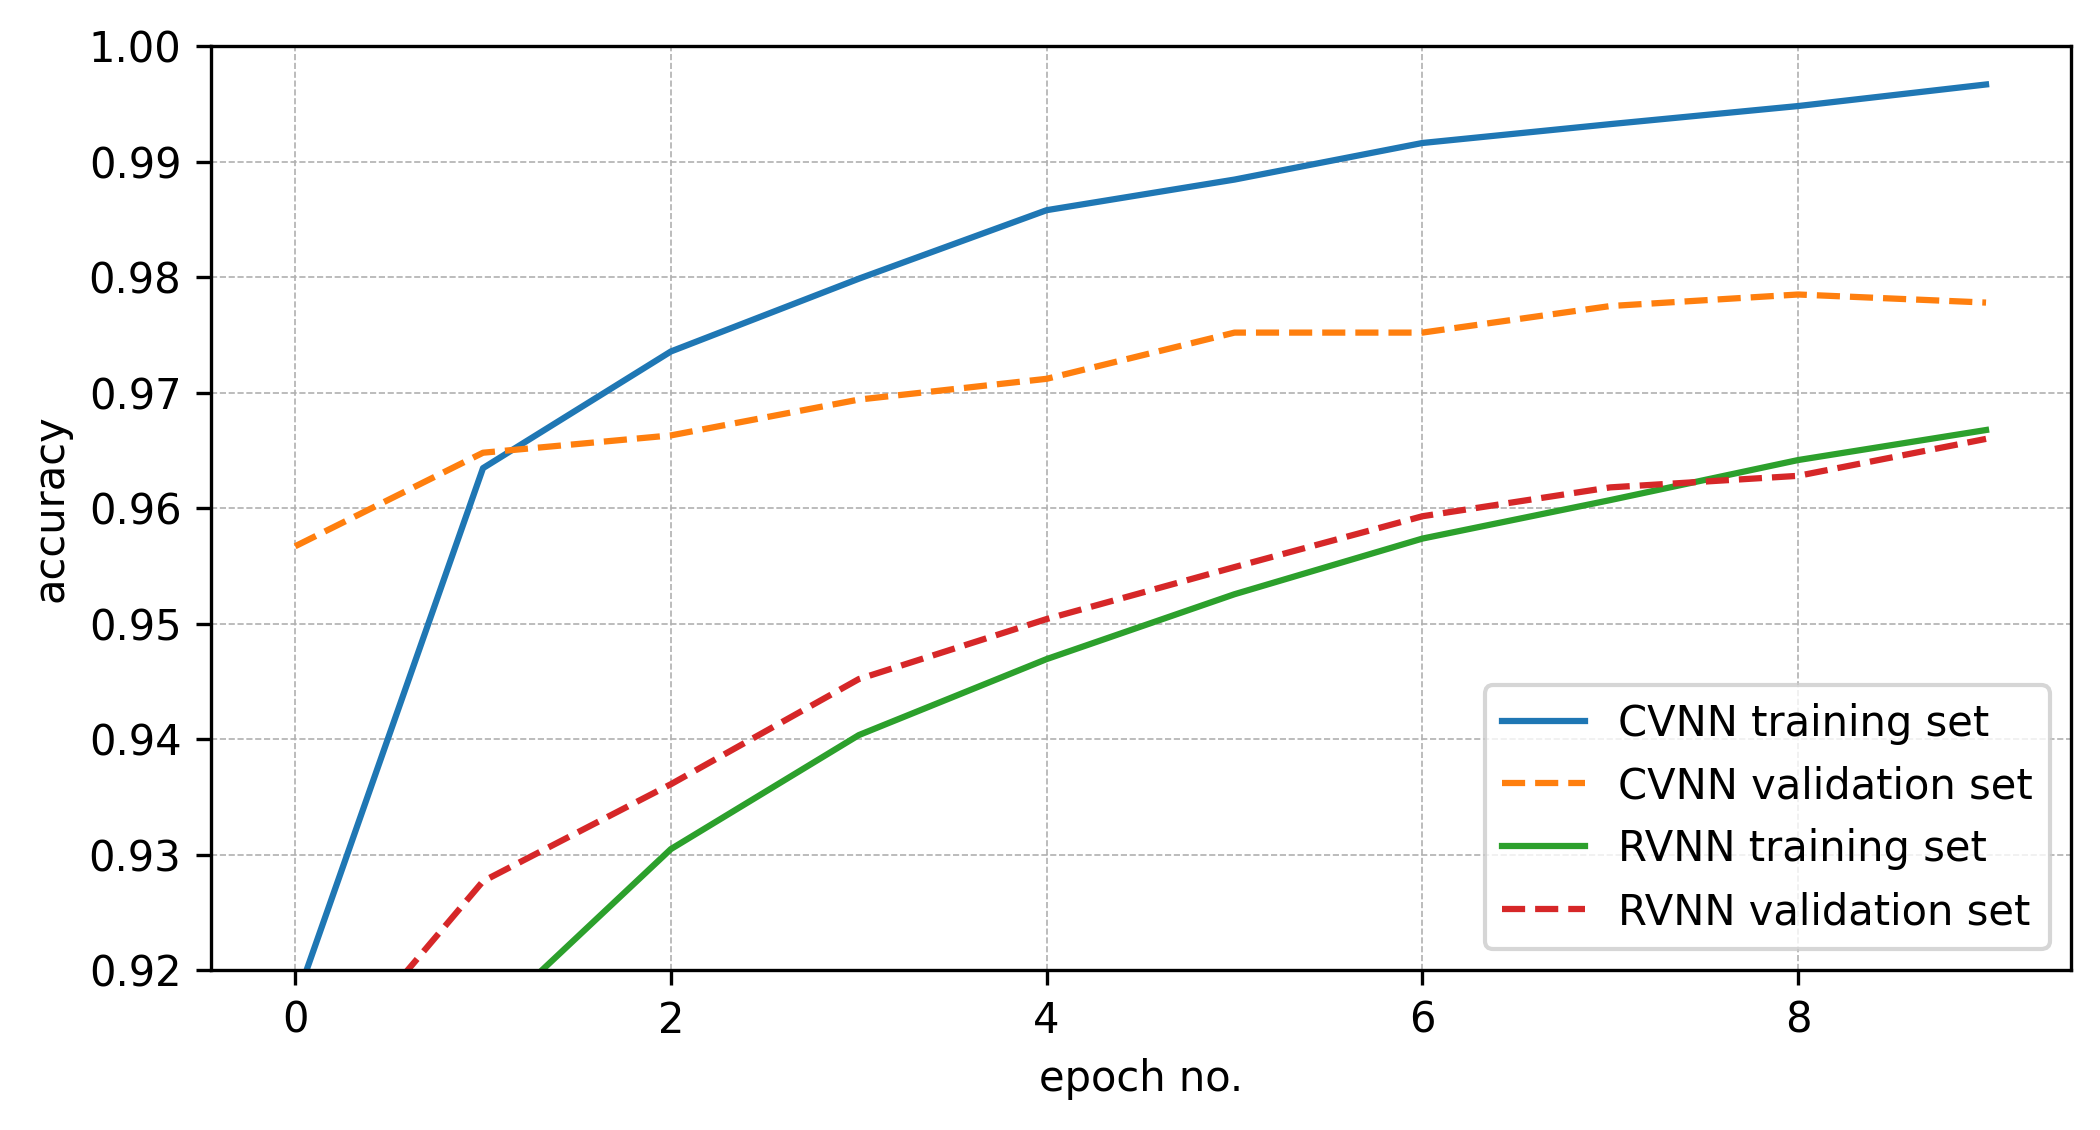

In [ ]:
# plot_loss_history_comparision(rvnn_history, cvnn_history, 2)
plot_accuracy_history_comparision(rvnn_history, cvnn_history)

In [38]:
raise "stop"

TypeError: exceptions must derive from BaseException

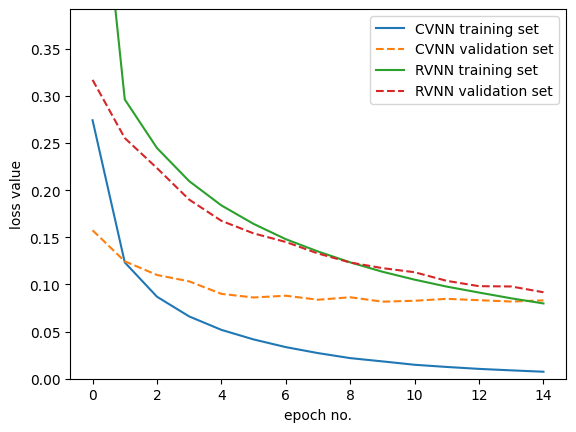

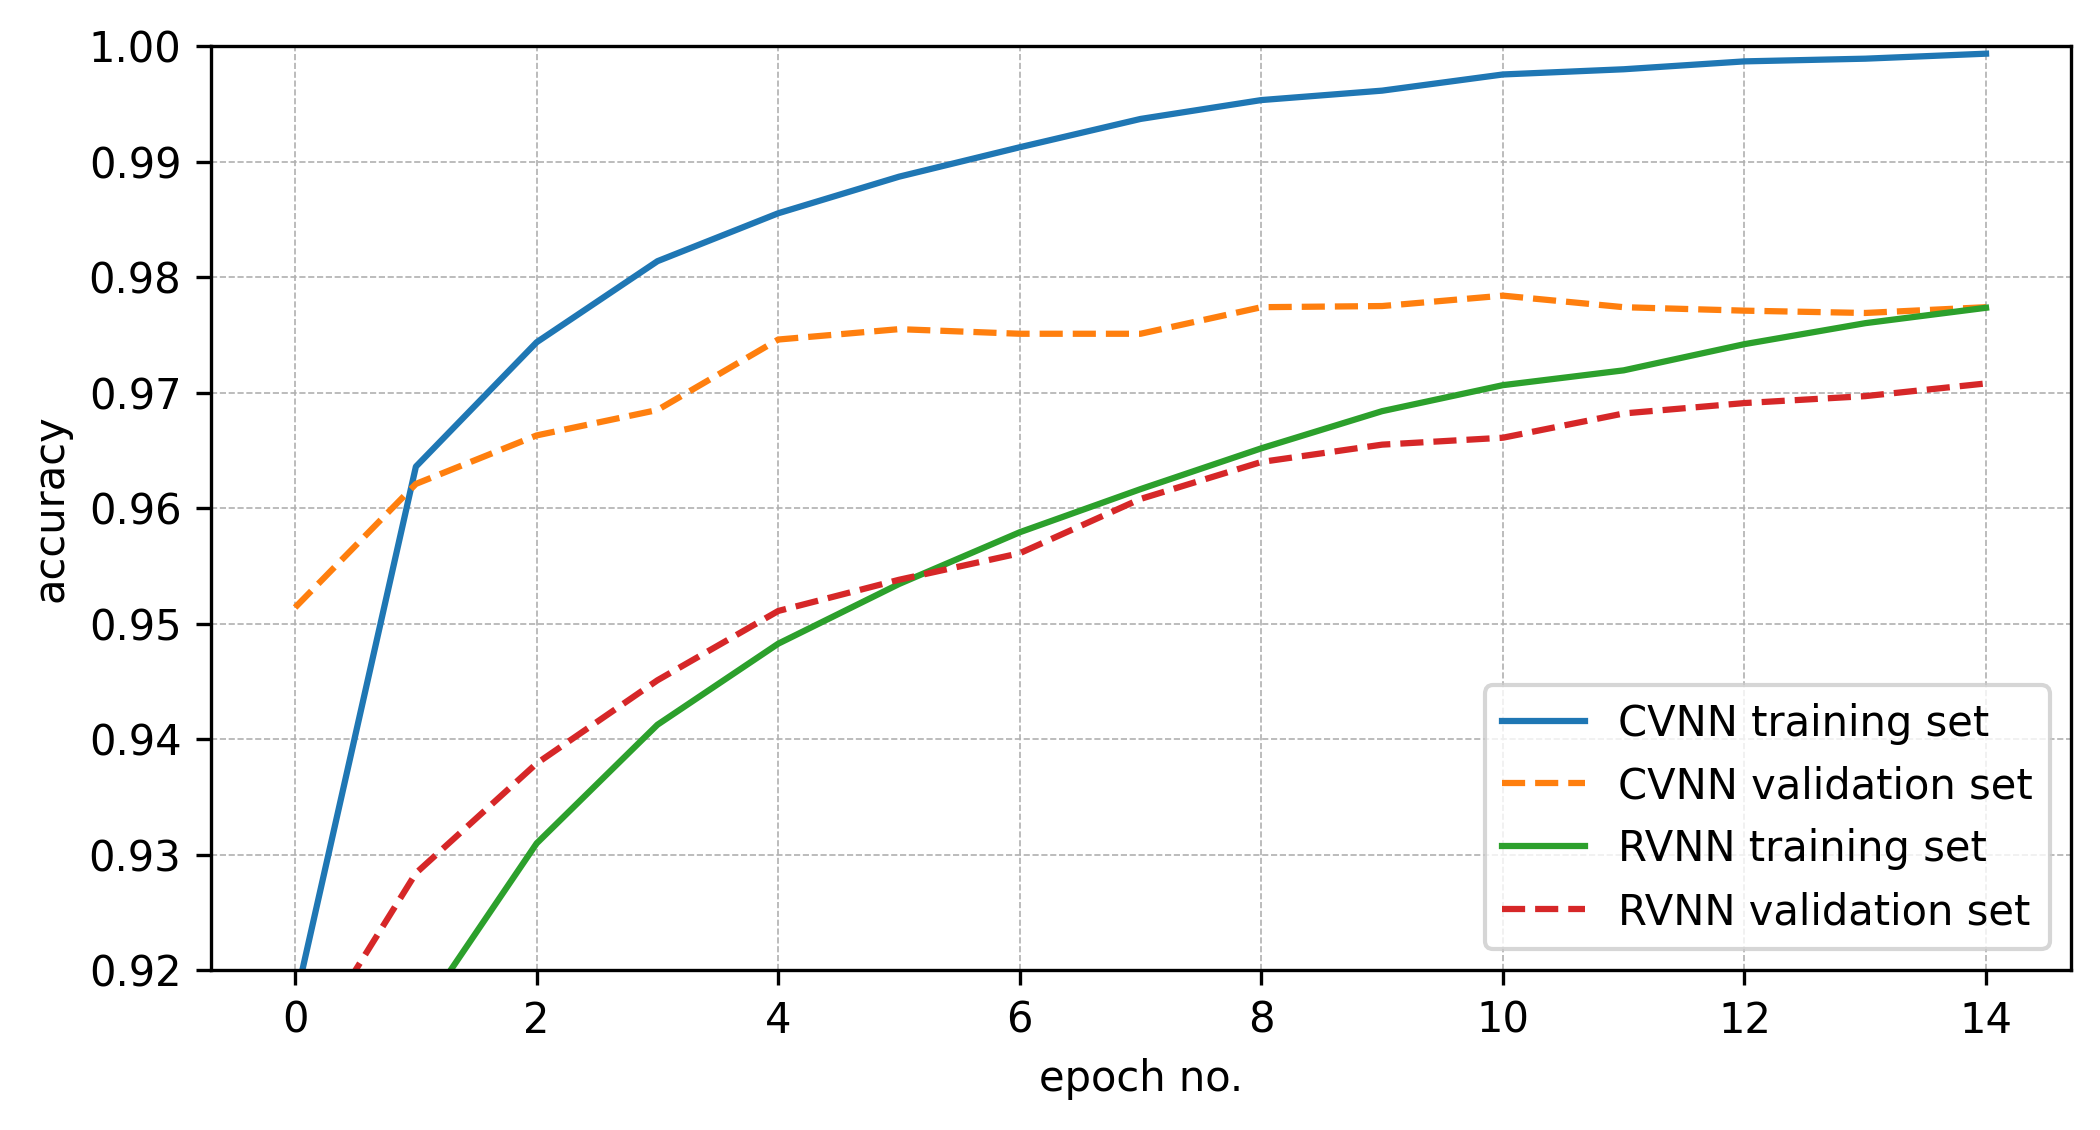

In [37]:
# SGD
plot_loss_history_comparision(rvnn_history, cvnn_history, 2)
plot_accuracy_history_comparision(rvnn_history, cvnn_history)

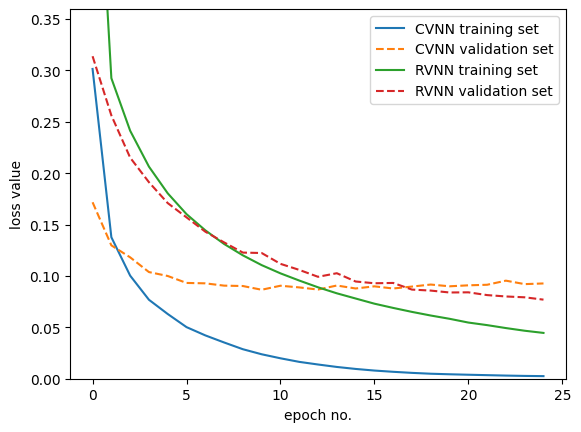

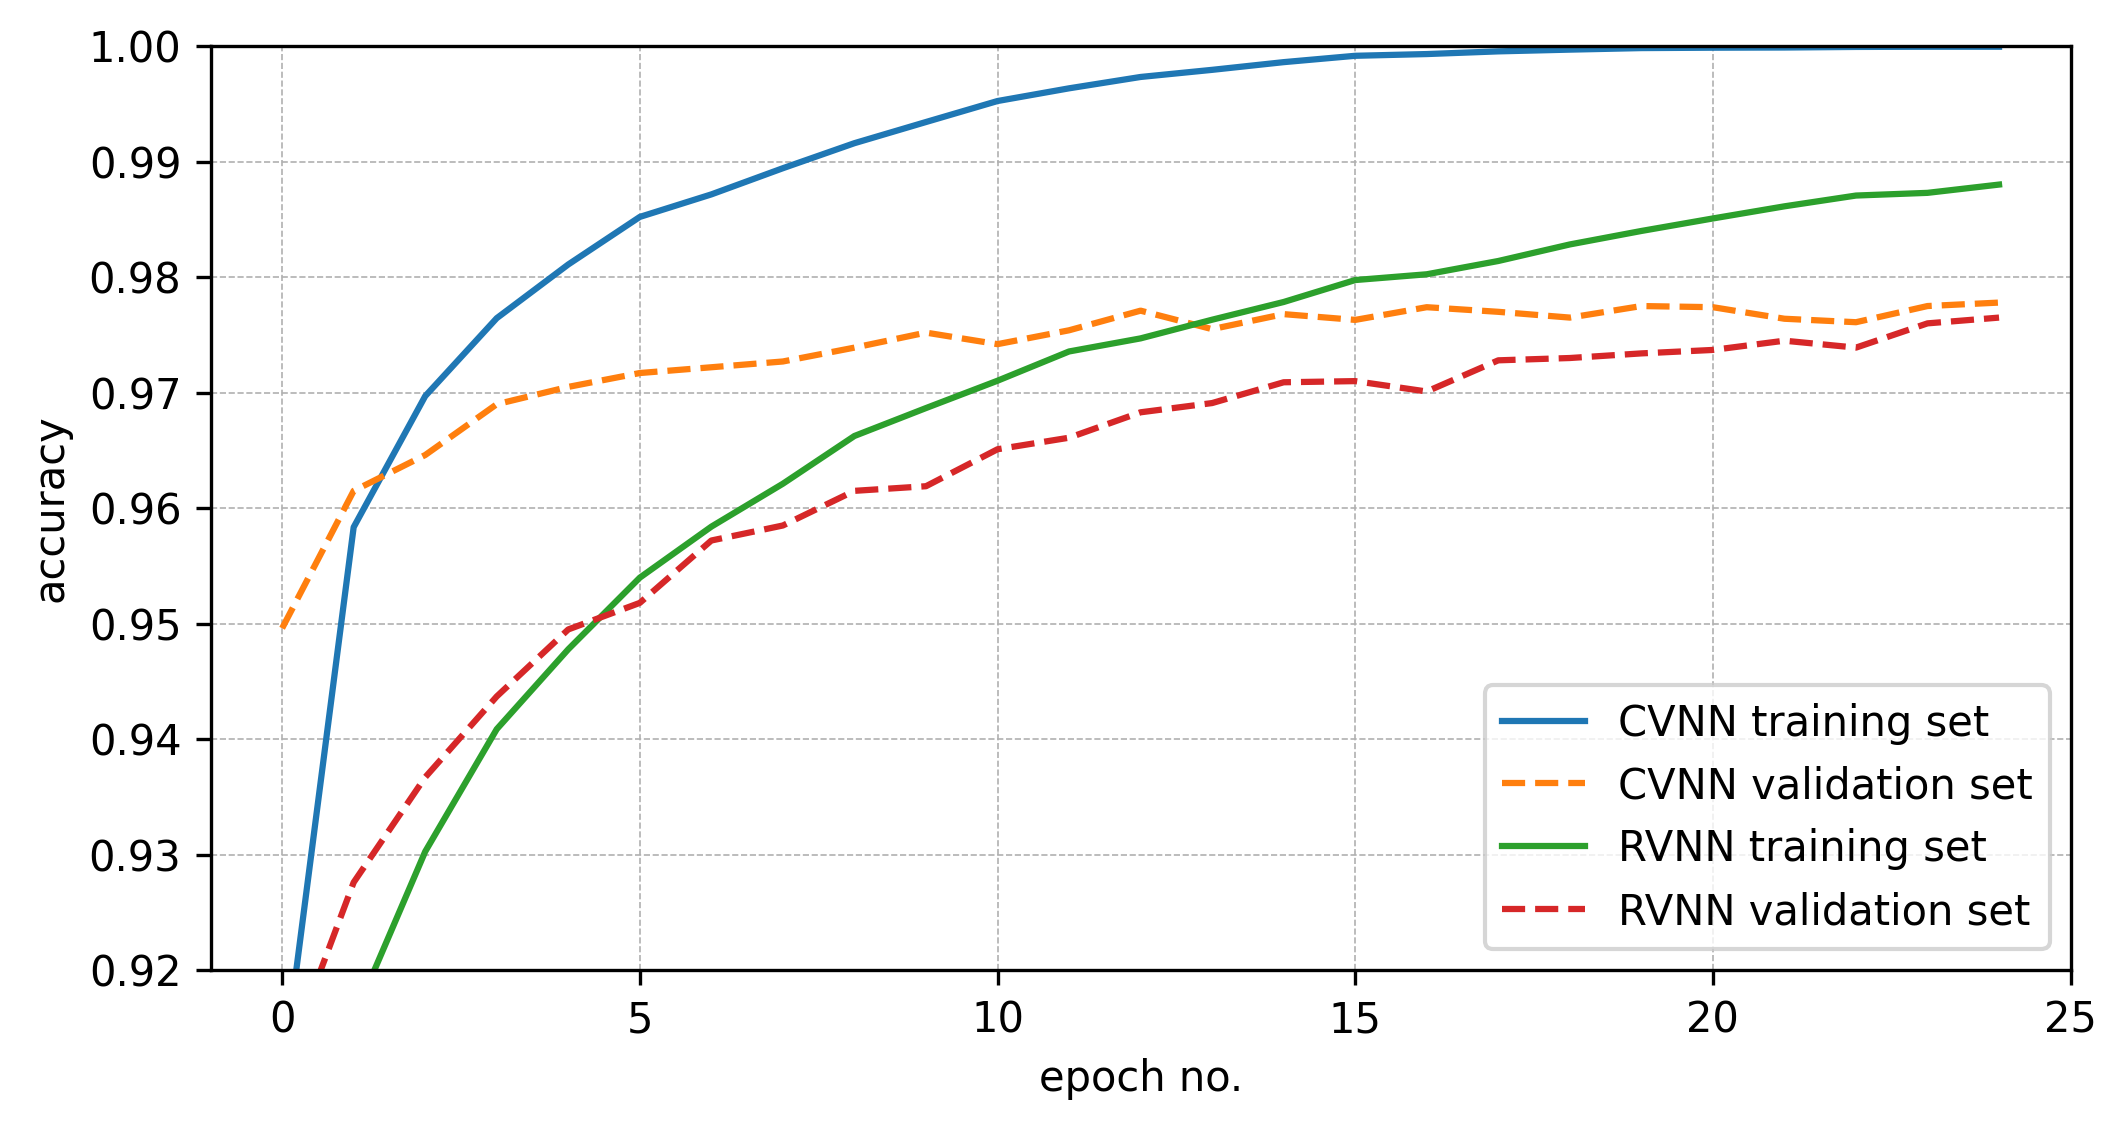

In [ ]:
# SGD
plot_loss_history_comparision(rvnn_history, cvnn_history, 2)
plot_accuracy_history_comparision(rvnn_history, cvnn_history)

In [ ]:
raise "stop"

## Tuning hyperparameters

### CVNN

In [ ]:
import keras_tuner as kt
import cvnn.activations as ca


def cvnn_model_builder(hp):
  model = tf.keras.Sequential()
  model.add(layers.ComplexInput(input_shape=(28, 28,)))
  model.add(layers.ComplexFlatten())

  hp_hidden_layer_activation = hp.Choice('hidden_layer_activation', values=['_cart_relu', '_complex_cardioid'])
  model.add(layers.ComplexDense(64, activation=hp_hidden_layer_activation[1:]))
  
  hp_output_layer_activation = hp.Choice('output_layer_activation', 
                                         values=['_sigmoid_real', '_softmax_real_with_abs', '_softmax_real_with_avg', '_softmax_real_with_mult', '_softmax_of_softmax_real_with_mult', 
                                                 '_softmax_of_softmax_real_with_avg', '_convert_to_real_with_abs', '_softmax_real_with_polar'])
  model.add(layers.ComplexDense(10, activation=hp_output_layer_activation[1:]))
  
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd'])
  if hp_optimizer_name == 'adam':
    hp_optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
  elif hp_optimizer_name == 'sgd':
    hp_optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)
  else:
      raise
    
  model.compile(optimizer=hp_optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

Using TensorFlow backend


In [ ]:
cvnn_tuner = kt.Hyperband(cvnn_model_builder,
                     objective='val_accuracy',
                     max_epochs=15,
                     factor=3,
                     directory='keras_tuner',
                     project_name='cvnn_mnist')

while True:
    try:
        cvnn_tuner.search(x_train_fourier, y_train, epochs=20, validation_data=(x_test_fourier, y_test))
    except:
        continue
    break

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.5415999889373779

Best val_accuracy So Far: 0.9614999890327454
Total elapsed time: 00h 00m 40s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
_complex_cardioid |_cart_relu        |hidden_layer_activation
_convert_to_rea...|_softmax_real_w...|output_layer_activation
0.001             |0.001             |learning_rate
sgd               |adam              |optimizer
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2965 - accuracy: 0.1106 - val_loss: 2.2854 - val_accuracy: 0.1655
Epoch 2/2
 802/1875 [===========>..................] - ETA: 1s - loss: 2.2805 - accuracy: 0.1623

Epoch 1/2
1249/1875 [==================>...........] - ETA: 0s - loss: 2.2939 - accuracy: 0.1026

In [ ]:
cvnn_best_hps = cvnn_tuner.get_best_hyperparameters(num_trials=1)[0]
cvnn_best_hps.values

{'hidden_layer_activation': '_cart_relu',
 'output_layer_activation': '_sigmoid_real',
 'learning_rate': 0.001,
 'optimizer': 'adam',
 'tuner/epochs': 5,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [ ]:
cvnn_model = cvnn_tuner.hypermodel.build(cvnn_best_hps)
cvnn_history = cvnn_model.fit(x_train_fourier, y_train, epochs=10, validation_data=(x_test_fourier, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2743 - accuracy: 0.9206 - val_loss: 0.1324 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9678 - val_loss: 0.1190 - val_accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9771 - val_loss: 0.1345 - val_accuracy: 0.9618
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9804 - val_loss: 0.1288 - val_accuracy: 0.9650
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9852 - val_loss: 0.1398 - val_accuracy: 0.9655
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.1326 - val_accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.1468 - val_accuracy:

### RVNN

In [ ]:
import keras_tuner as kt

def rvnn_model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dense(10))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
  if hp_optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
  elif hp_optimizer == 'sgd':
    optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate)
  else:
      raise
    
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
rvnn_tuner = kt.Hyperband(rvnn_model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='keras_tuner',
                     project_name='rvnn_mnist')

rvnn_tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Reloading Tuner from keras_tuner/rvnn_mnist/tuner0.json


In [ ]:
rvnn_best_hps = rvnn_tuner.get_best_hyperparameters(num_trials=1)[0]
rvnn_best_hps.values

{'learning_rate': 0.001,
 'optimizer': 'adam',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [ ]:
rvnn_model = rvnn_tuner.hypermodel.build(rvnn_best_hps)
rvnn_history = rvnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9260 - val_loss: 0.1365 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1119 - accuracy: 0.9674 - val_loss: 0.0999 - val_accuracy: 0.9684
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0779 - accuracy: 0.9771 - val_loss: 0.0810 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 0.0785 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0778 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0726 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0743 - val_accuracy:

### comparision

CVNN hyperparameters = {'hidden_layer_activation': '_cart_relu', 'output_layer_activation': '_sigmoid_real', 'learning_rate': 0.001, 'optimizer': 'adam', 'tuner/epochs': 5, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
RVNN hyperparameters = {'learning_rate': 0.001, 'optimizer': 'adam', 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}


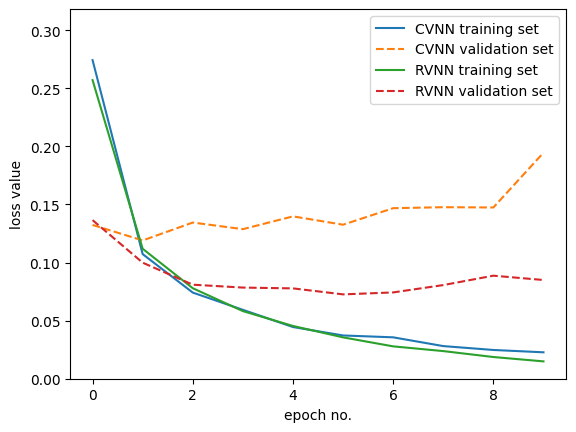

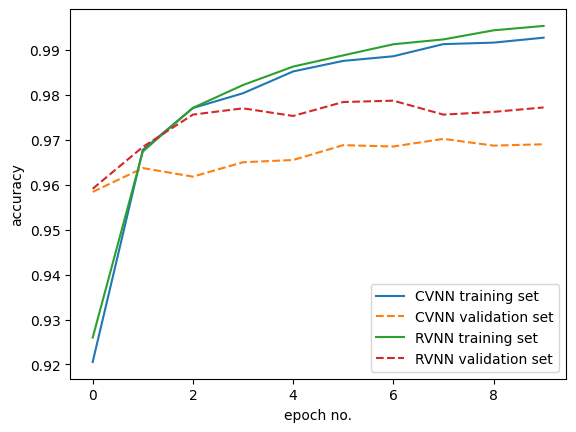

In [ ]:
print('CVNN hyperparameters =', cvnn_best_hps.values)
print('RVNN hyperparameters =', rvnn_best_hps.values)
plot_loss_history_comparision(rvnn_history, cvnn_history, 2)
plot_accuracy_history_comparision(rvnn_history, cvnn_history)